# Feladatok

## 01-osztálynévsor

A `Megoldás` mappában megtalálható az `osztaly.csv` fájl. Ez egy osztály öt témazáróra `[T1,T2,T3,T4,T5]` kapott jegyeit tartalmazza néhány plusz információval (`Nem`, `Kor`, `Fakt`) kiegészítve. A `Fakt` oszlopban az 1-es azt jelöli, hogy az adott ember jár matekfaktra.

1. Olvasd be a fájlt egy DataFrame-be! Vigyázz arra, hogy a szövegfájlban a mezők a `#` jellel vannak elválasztva. (Ha a fejlécet és az indexet automatikusan készíted (nem adsz meg semmit), akkor az index 0-tól növekvő számsorozat, a fejléc pedig a szövegfájl első sora lesz, a további munkához ezek elegendők.)

2. Rendezd a táblázatot névsor szerint úgy, hogy az az előző, nem rendezett táblázatot felülírja!

3. Minden emberhez számold ki az 5 dolgozatának átlagát!

4. Hány darab faktos lány van?

5. Írasd ki a 16 évesek neveit!

7. ☠ Hányféle férfi keresztnév szerepel a táblázatban?

8. ☠ Készíts egy táblázatot, amelyben a sorok a különböző korcsoportok, az oszlopok a nemek, az értékek pedig a kor/nem szerinti dolgozatátlagok!

In [117]:
import pandas as pd


%pylab inline

rcParams["font.size"]=15

Populating the interactive namespace from numpy and matplotlib


In [57]:
#pd.read_csv("data/osztaly.csv",sep="#")
df=pd.read_csv("data/osztaly.csv",sep="#",index_col=0,encoding="utf8")
#df.sort_values(by="Név",ascending=True,inplace=True)
#df.sort_values(by='',ascending=True,inplace=True)
df.sort_index(ascending=True,inplace=True)
df.tail()

,T1,T2,T3,T4,T5,Nem,Kor,Fakt
Név,,,,,,,,
Szilágyi Áron,3,5,4,4,3,f,18,0
Szász Emese,3,3,5,4,5,l,18,0
Tóth Bálint,3,5,3,4,3,f,18,1
Vass Lili,4,5,3,4,3,l,17,0
Ágh Nóra,3,3,5,3,4,l,16,0


In [39]:
df.iloc[:,:5].mean(axis=1);

In [41]:
df[(df['Fakt']==1) & (df['Nem']=='l')];

In [49]:
df['Kor']==16;

In [55]:
df=pd.read_csv("data/osztaly.csv",sep="#")
set([N.split(" ")[1] for N in df[df['Nem']=='f']['Név'].as_matrix() ])

{'Balázs',
 'Bence',
 'Bálint',
 'Béla',
 'Dániel',
 'Dávid',
 'György',
 'Géza',
 'Károly',
 'László',
 'Mátyás',
 'Pista',
 'Áron'}

## 02-érettségi adatok

Olvasd be egy pandas DataFrame-be a mintapéldában is használt érettségikről szóló adatfájlt!

1. Mely városok dobogósak, ha a 2015-ös emelt szintű érettségik átlagos százalékát nézzük? És mely megyék vannak az utolsó ötben?

2. Az ember gyakran hallja, hogy a lányok szóban jobban teljesítenek, mint a fiúk. Vegyük évenként csoportosítva az emelt szintű érettségik szóbeli pontszámának átlagát a lányokra és a fiúkra egy külön DataFrame-be! Vonjuk ki egymásból a két értéket, majd az eredményt ábrázoljuk oszlopdiagramon. Megjelenik-e a nemek közötti különbség a szóbeli pontszámában? *Figyelj a szépen formázott, megfelelő tengelyfeliratokra, és a megfelelő ábraméretre!*

3. A két szinten hogyan oszlanak el a nemek? Ábrázold két kördiagramon a fiúk és a lányok arányát, a körcikkekre írd rá a százalékos értéket 1 tizedesjegyre kerekítve! *Figyelj a szépen formázott, megfelelő tengelyfeliratokra, és a megfelelő ábraméretre!* (Megjegyzés: a "nő" szóban az "ő" helyett "õ" szerepel.)

4. Ábrázold hisztogramon 2014-es középszintű érettségi jegyeloszlását, a pandas DataFrame-hez tartozó plot parancsot használva. Az x tengely felirata legyen az 5 lehetséges érdemjegy, az ábrán csak az ezekhez tartozó oszlopok látszódjanak ([puska](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html))! *Figyelj a szépen formázott, megfelelő tengelyfeliratokra, és a megfelelő ábraméretre!*

5. ☠ Találj ki egy számodra érdekes kérdést ezzel az adathalmazzal kapcsolatban, és válaszold meg pandas segítségével! (Ötletek érdekes adatokra: előrehozott érettségi, szintemelő érettségi, levelező képzés stb.)

6. ☠  Mennyi volt iskolatípusonként az emelt szintű dolgozatok átlagpontszáma 2011 és 2015 között évenként? Ábrázold oszlopdiagramon az eredményt, figyelj a szépen formázott, megfelelő tengelyfeliratokra, és a megfelelő ábraméretre! (Segítség: év és iskolatípus szerint is kell majd csoportosítani, majd pedig `pivot_table`-t készíteni, miután a megfelelő oszlopokat kivettük az indexből.)

7. ☠ Oldd megy a 2. feladatot `apply` segítségével! Vázlat segítségül:
    * Csoportosíts év és nem szerint.
    * Számold ki a csoportonkénti szóbeli pontszám átlagát.
    * Készíts `pivot_table`-t, az oszlopok legyenek a nemek.
    * `apply` segítségével hozz létre egy új oszlopot, amely a férfi és a nő oszlop különbsége lesz minden sorban.
    * Ábrázold csak ezt az oszlopot oszlopdiagramon.

In [80]:
erettsegi_adat=pd.read_csv("data/erettsegi.csv.gz",encoding="utf8",sep=";",index_col=0)

In [82]:
erettsegi_adat.shape

(21890, 29)

In [89]:
ea2025os=erettsegi_adat['év']==2015
atlszaz=erettsegi_adat[ea2025os].groupby('intézmény városa')['össz százalék'].mean()#.as_matrix()
atlszaz.nlargest(5);

In [90]:
atlszaz=erettsegi_adat[ea2025os].groupby('intézmény megyéje')['össz százalék'].mean()#.as_matrix()
atlszaz.nsmallest(5);

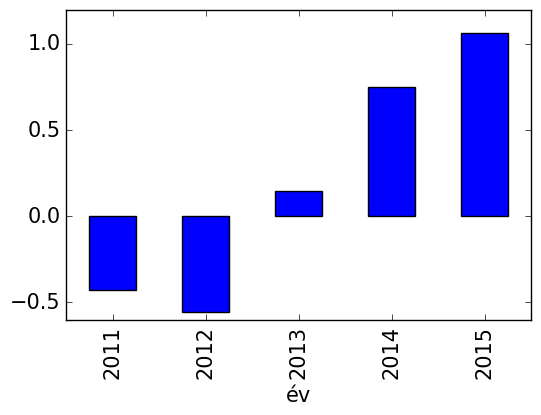

In [119]:
eaevf=erettsegi_adat[erettsegi_adat['vizsgázó neme']=='férfi'].groupby(['év'])['szóbeli pontszám']
eaevl=erettsegi_adat[erettsegi_adat['vizsgázó neme']=='nõ'].groupby(['év'])['szóbeli pontszám']
#eaev=erettsegi_adat.groupby(['év','vizsgázó neme'])['szóbeli pontszám']
dd=eaevf.mean()-eaevl.mean()
dd.plot(kind="bar", figsize=(6, 4))

#vv=eaev[::2]-eaev[1::2]
#vneaev=eaev.groupby('vizsgázó neme')
#vneaev.mean()

In [59]:
erettsegi_adat.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21880,21881,21882,21883,21884,21885,21886,21887,21888,21889
intézmény megyéje,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,...,Zala,Zala,Zala,Zala,Zala,Zala,Zala,Zala,Zala,Zala
intézmény városa,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,Budapest,...,Keszthely,Zalaegerszeg,Keszthely,Zalaegerszeg,Keszthely,Zalaegerszeg,Zalaegerszeg,Keszthely,Nagykanizsa,Zalaegerszeg
vizsgázó évfolyama,12,12,12,13,12,12,13,12,13,2,...,12,12,12,12,12,12,12,12,12,NaN
vizsgázó képzési típusa,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,-,...,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,gimnázium,-
vizsgázó neme,férfi,nõ,férfi,nõ,férfi,férfi,férfi,férfi,nõ,nõ,...,férfi,nõ,férfi,férfi,nõ,férfi,férfi,férfi,férfi,férfi
vizsgázó képzési munkarendje,nappali,nappali,nappali,nappali,nappali,nappali,nappali,nappali,nappali,nappali,...,nappali,nappali,nappali,nappali,nappali,nappali,nappali,nappali,nappali,nincs tanulói jogviszonya
vizsgatárgy neve,fizika,fizika,fizika,fizika,fizika,fizika,fizika,fizika,fizika,fizika,...,fizika,fizika,fizika,fizika,fizika,fizika,fizika,fizika,fizika,fizika
vizsga szintje,közép,közép,közép,közép,közép,közép,közép,közép,közép,közép,...,emelt,emelt,emelt,emelt,emelt,emelt,emelt,emelt,emelt,emelt
vizsga fajtája,elõrehozott,elõrehozott,elõrehozott,elõrehozott,elõrehozott,elõrehozott,elõrehozott,elõrehozott,elõrehozott,kiegészítõ,...,rendes,rendes,szintemelõ,szintemelõ,szintemelõ,rendes,rendes,rendes,rendes,szintemelõ
vizsgamentesség,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
